## Открываем файл с данными и изучаем общую информацию

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from scipy import stats as st

In [ ]:
try:
    df = pd.read_csv('C:/Users/Student/Desktop/games.csv')
except:
    df = pd.read_csv('/datasets/games.csv')

In [ ]:
#изучаем датасет
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Вывод:**
- при изучении общей информации видно, что таблица содержит 11 колонок, тип данных float64(6), object(5), общее количество строк 16715, название колонок имеет верблюжий стиль.

## Подготовка данных

### Заменим название столбцов (приведём к нижнему регистру)

In [ ]:
df.columns = df.columns.str.lower() #привидем к нижнему регистру используя метод lower()

In [ ]:
df.head() #проверим результат

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Обработаем пропуски и дубликаты

In [ ]:
# проверим количество дубликатов
df.duplicated().sum()

0

**Вывод:**
- **дубликатов не обнаружено**

In [ ]:
# проверим количество пропусков
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

**Вывод:**
- **пропуски обнаружены в 5-ти столбцах, незначительное число пропусков разумно удалить остальные рассмотрим подробнее**

**столбци year_of_release, genre**

In [ ]:
#удаляем пропуски методом dropna()
df = df.dropna(subset=['year_of_release', 'genre'])

**столбец critic_score**

изучаем уникальные значения

In [ ]:
df['critic_score'].unique() #применяем метод unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

**Вывод:**
- **принимае, что критики недали свою оценку 8578 кол игр**
- **возможно ошибка при сооединении двух таблиц**
- **заполняем столбец critic_score — оценка критиков значением 0**  

In [ ]:
df['critic_score'] = df['critic_score'].fillna(0) #заполняем пропуски значением 0

**столбец user_score**

изучаем уникальные значения

In [ ]:
df['user_score'].unique() #применяем метод unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

**Вывод:**
- **видим,что встолбце user_score два вида пропусков nan и 'tbd'**
- **возможно ошибка при сооединении двух таблиц**

In [ ]:
df[df['user_score'] == 'tbd'].nunique().sum()# найдем количество пропуско 'tbd'

2234

**Вывод:**
- **пропусков с значением 'tbd' слишком много, что бы их удалить**
- **в столбце user_score значение 'tbd' говорит о том что, оценка пользователей неопределена**  
- **приравняем значение 'tbd' к значению nan**

In [ ]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)#приравняем значение 'tbd' к значению nan

**Вывод:**
- **принимае, что пользователи недали свою оценку**
- **заполняем столбец critic_score — оценка пользователей значением 0**

In [ ]:
df['user_score'] = df['user_score'].fillna(0) #заполняем пропуски значением 0

**столбец rating**

**Вывод:**
- **возможно ошибка при сооединении двух таблиц**

In [ ]:
# заменим пропуски на Unknown
df['rating'] = df['rating'].fillna('Unknown')

In [ ]:
df['rating'].unique()

array(['E', 'Unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

In [ ]:
df['rating'].value_counts()

Unknown    6676
E          3921
T          2905
M          1536
E10+       1393
EC            8
K-A           3
RP            1
AO            1
Name: rating, dtype: int64

**4 вида рейтинга встречаются часто: Е, Т, М и Е10+, а 4 встречаются очень редко. Их можно заменить:**
- АО - заменить на М;
- RP - заменить на Unknown;
- ЕС - заменить на Е;
- К-А - заменить на Е.

In [ ]:
df.loc[df['rating'] == 'AO', 'rating'] = 'M'
df.loc[df['rating'] == 'RP', 'rating'] = 'Unknown'
df.loc[df['rating'].isin(['EC', 'K-A']), 'rating'] = 'E'

**количество пропусков после обработки**

In [ ]:
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

### Преобразуйем данные в нужные типы

In [ ]:
# преобразуем данный столбец к целочисленному значению
df['critic_score'] = df['critic_score'].astype('int')
df['year_of_release'] = df['year_of_release'].astype('int')

In [ ]:
df['user_score'] = df['user_score'].astype('float')

**Вывод:**
- **столбец critic_score - оценка критиков от 1 до 10, врядли десятые повлияют на точность иследования, а восприятия таблици улучшется**
- **столбец year_of_release - год выпуска должен быть целочисленым**


**таблица после обработки пропуско, дубликато и изменения типа данных**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


### Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [ ]:
df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

**Вывод: при подготовк данных,**
- **пропуски обнаружены в 5-ти столбцах, незначительное число пропусков разумно удалить**
- **изучили уникальные значения**
- **дубликатов не обнаружено**
- **привели к нижнему регистру название колонок**
- **возникновение пропусков, возможно ошибка при сооединении двух таблиц**
- **создали столбец df['total_sales']**
- **преобразовали данные в нужные типы**

## Проведём исследовательский анализ данных

### Посмотрите, сколько игр выпускалось в разные годы.

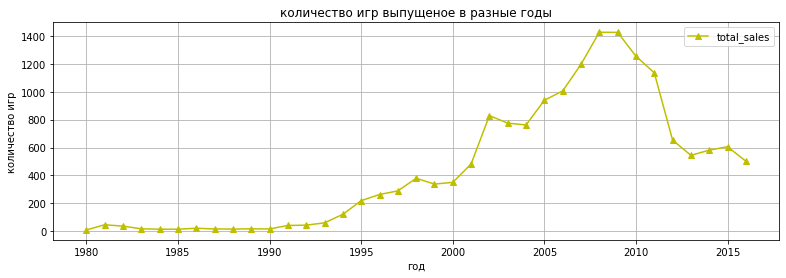

In [ ]:
df.pivot_table(index='year_of_release', values='total_sales', aggfunc='count').reset_index().plot(
                      x='year_of_release', y='total_sales', grid=True, figsize=(13, 4), style='y^-').set(
                      title='количество игр выпущеное в разные годы',
                      xlabel='год', ylabel='количество игр');

**Вывод:**
- **из графика видно что пиковые значения находятся в период с 2005 года по 2010 год, далее на спад возможно повлиял кризис**

### Как менялись продажи по платформам

<AxesSubplot:xlabel='platform'>

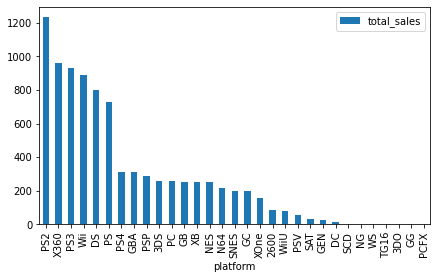

In [ ]:
df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(
    'total_sales', ascending=False).plot(kind='bar', figsize = (7,4))

**Вывод:**
- **из графика видно максимальное количество продаж в 6-ти  группах: PS2, X360, PS3, Wii, DS, PS**

### Выбераем платформы с наибольшими суммарными продажами и строим распределение по годам.

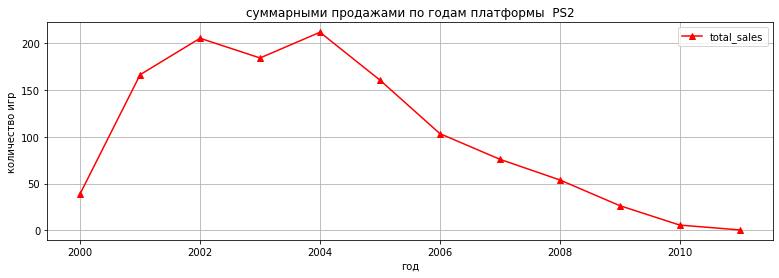

In [ ]:
df.query('platform == "PS2"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').reset_index().plot(
                      x='year_of_release', y='total_sales', grid=True, figsize=(13, 4), style='r^-').set(
                      title='суммарными продажами по годам платформы  PS2',
                      xlabel='год', ylabel='количество игр');

**Вывод:**
- **платформа PS2, продажи начались 2000г, пик продаж наблюдался в период с 2001г по 2005г, затем следует спад, в 2011г. продажи прекратились**

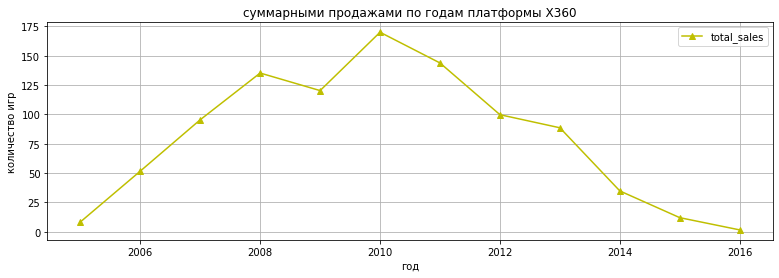

In [ ]:
df.query('platform == "X360"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').reset_index().plot(
                      x='year_of_release', y='total_sales', grid=True, figsize=(13, 4), style='y^-').set(
                      title='суммарными продажами по годам платформы X360',
                      xlabel='год', ylabel='количество игр');

**Вывод:**
- **платформа X360, продажи начались 2005г, пик продаж наблюдался в период с 2007г по 2012г, затем следует спад, в 2016г. продажи прекратились**

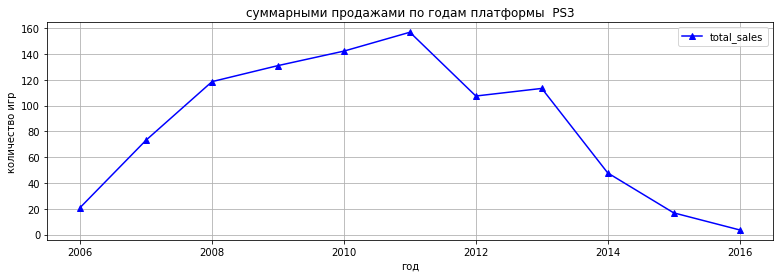

In [ ]:
df.query('platform == "PS3"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').reset_index().plot(
                      x='year_of_release', y='total_sales', grid=True, figsize=(13, 4), style='b^-').set(
                      title='суммарными продажами по годам платформы  PS3',
                      xlabel='год', ylabel='количество игр');

**Вывод:**
- **платформа PS3, продажи начались 2006г, пик продаж наблюдался в период с 2008г по 2013г, затем следует спад, в 2016г. продажи прекратились**

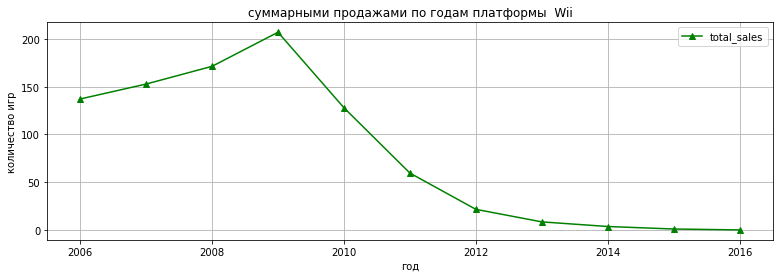

In [ ]:
df.query('platform == "Wii"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').reset_index().plot(
                      x='year_of_release', y='total_sales', grid=True, figsize=(13, 4), style='g^-').set(
                      title='суммарными продажами по годам платформы  Wii',
                      xlabel='год', ylabel='количество игр');

**Вывод:**
- **платформа Wii, продажи начались 2006г, пик продаж наблюдался в период с 2006г по 2010г, затем следует спад, в 2016г. продажи прекратились**

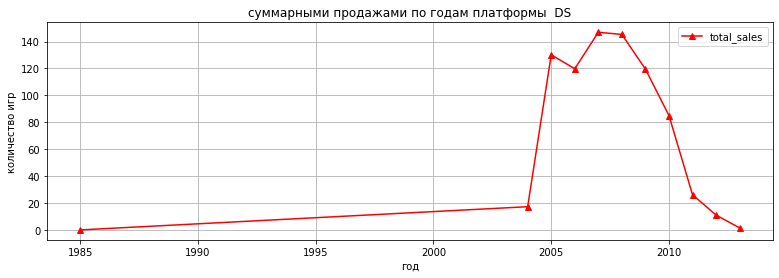

In [ ]:
df.query('platform == "DS"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').reset_index().plot(
                      x='year_of_release', y='total_sales', grid=True, figsize=(13, 4), style='r^-').set(
                      title='суммарными продажами по годам платформы  DS',
                      xlabel='год', ylabel='количество игр');

**Вывод:**
- **платформа DS, продажи начались 1985г, пик продаж наблюдался в период с 2005г по 2009г, затем следует спад, в 2013г. продажи прекратились**

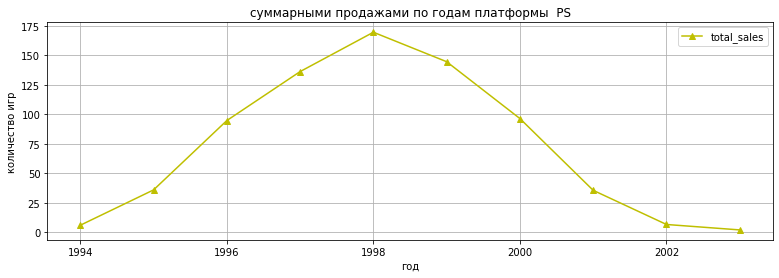

In [ ]:
df.query('platform == "PS"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').reset_index().plot(
                      x='year_of_release', y='total_sales', grid=True, figsize=(13, 4), style='y^-').set(
                      title='суммарными продажами по годам платформы  PS',
                      xlabel='год', ylabel='количество игр');

**Вывод:**
- **платформа PS, продажи начались 1994г, пик продаж наблюдался в период с 1997г по 1999г, затем следует спад, в 2003г. продажи прекратились**

**Общий вывод по пункту 3.3:**
- **старые плотформы образовывались 1985 и 1994 годах в среднем живут от 10 до 20 лет**
- **новые платформы появляются примерно через 2-3 года после исчезновения старых**
    

### Построим прогноз на 2017 год.

**по ранее отобранным перспективным группам X360, PS3, Wii проведем прогноз на 2017 год., на графике "количество игр выпущеное в разные годы" четко прослеживается аналитическое плато с 2013г по 2016г, его и возьмем за актуальный период.**

In [ ]:
slice_year = df.query('year_of_release >= 2013')

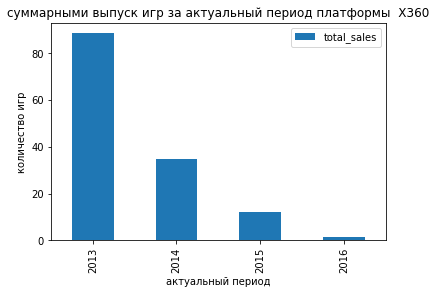

In [ ]:
slice_year.query('platform == "X360"').pivot_table(
    index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar').set(
                      title='суммарными выпуск игр за актуальный период платформы  X360',
                      xlabel='актуальный период', ylabel='количество игр');

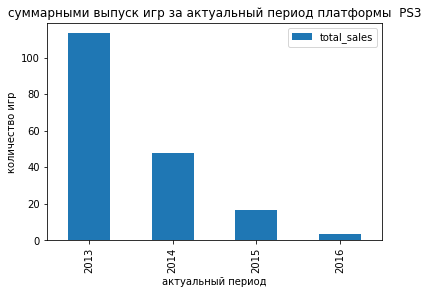

In [ ]:
slice_year.query('platform == "PS3"').pivot_table(
    index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar').set(
                      title='суммарными выпуск игр за актуальный период платформы  PS3',
                      xlabel='актуальный период', ylabel='количество игр');

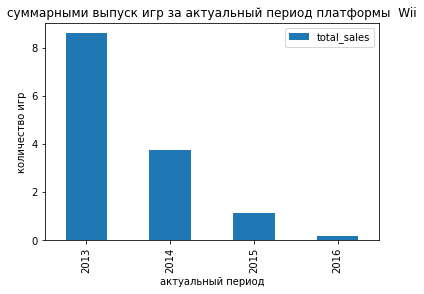

In [ ]:
slice_year.query('platform == "Wii"').pivot_table(
    index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar').set(
                      title='суммарными выпуск игр за актуальный период платформы  Wii',
                      xlabel='актуальный период', ylabel='количество игр');

**Вывод:**
- **по выше построиным гистограммам с наибольшой вероятностью можно сказать, что 2017 году будут выпускаться игры на платформах X360, PS3**

### Выберим несколько потенциально прибыльных платформ.

**Вывод:**
- **наиболее прибыльными платформами можно считать X360, PS3, Wii так как они в топе по прибыли, продолительности продаж и перспективе ближайшего будущего.**
- **есть смысл развивать и вкладываться в выше указанные платформы.**

### Построим график «ящик с усами» по глобальным платформам.

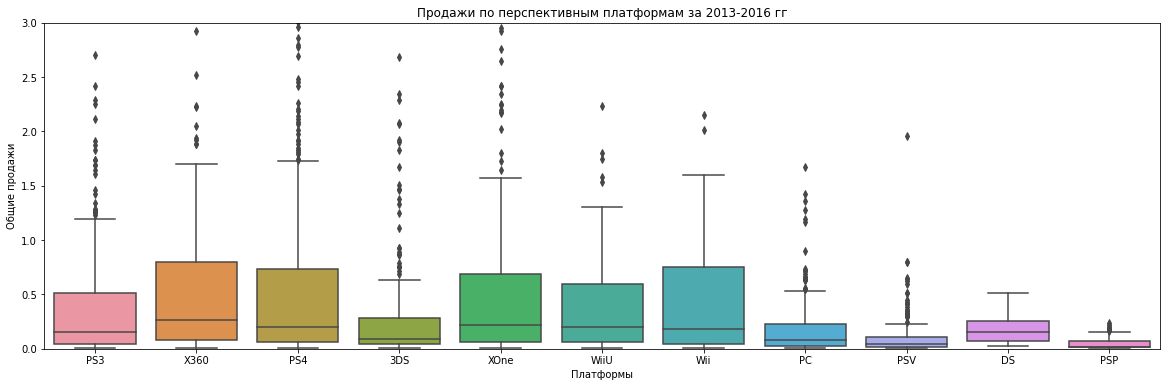

In [ ]:
# построим график по глобальным продажам игр в разбивке по платформам
fig = plt.figure(figsize = (20,6))
sns.boxplot(data = slice_year, y = 'total_sales', x = 'platform').set(
    title = 'Продажи по перспективным платформам за 2013-2016 гг',
    xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 3))
plt.show()

**Вывод:**
- **большевсего продаются платформы X360, PS4, XOne, WiiU, Wii**
- **медианы у лидеров находятся примерно на одном уровне**
- **выбросы и аномалии находятся за приделами усов**
- **широкий размах усов у ящиков говорит о том, что в диапазон попадает большое число продаж**

###  Строим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами одной популярной платформы PS3.

[Text(0.5, 1.0, 'Диаграмма рассеивания между отзывами критиков и продажами'),
 Text(0.5, 0, 'Отзывы'),
 Text(0, 0.5, 'Продажи')]

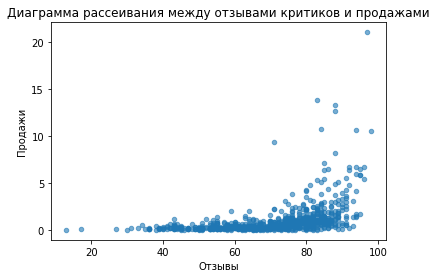

In [ ]:
popular_platform = df.query('platform == "PS3"')
popular_platform[popular_platform['critic_score'] != 0].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.6).set(
    title='Диаграмма рассеивания между отзывами критиков и продажами', xlabel='Отзывы', ylabel='Продажи')

**Вывод:**
- **на диаграмме видно, что отрывов мало**
- **в целом даграмма плотная**

**Коэффициент Пирсона**

In [ ]:
print(popular_platform['critic_score'].corr(popular_platform['total_sales']))

0.35514556594230773


**Вывод:**
- **Корреляция в 0.35 говорит о наличии довольно слабой связи.**

[Text(0.5, 1.0, 'Диаграмма рассеивания между отзывами пользователей и продажами'),
 Text(0.5, 0, 'Отзывы'),
 Text(0, 0.5, 'Продажи')]

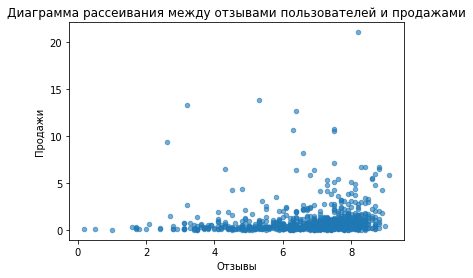

In [ ]:
popular_platform = df.query('platform == "PS3"')
popular_platform[popular_platform['user_score'] != 0].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.6).set(
    title='Диаграмма рассеивания между отзывами пользователей и продажами', xlabel='Отзывы', ylabel='Продажи')

**Вывод:**
- **на диаграмме видно, что отрывов мало**
- **в целом даграмма плотная**

**Коэффициент Пирсона**

In [ ]:
print(popular_platform['user_score'].corr(popular_platform['total_sales']))

0.2745827060165664


**Вывод:**
- **Корреляция в 0.27 говорит о наличии довольно слабой связи.**

**Общий вывод по разделу:**
- **отзывы критиков и пользователей не влияют на продажи**

### Соотнесём выводы с продажами игр на других платформах.

[Text(0.5, 1.0, 'Диаграмма рассеивания между отзывами критиков и продажами'),
 Text(0.5, 0, 'Отзывы'),
 Text(0, 0.5, 'Продажи')]

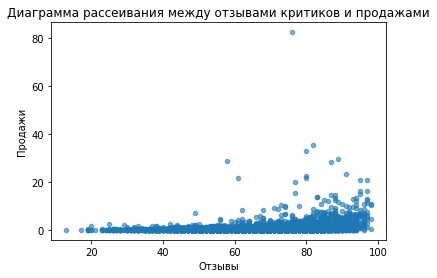

In [ ]:
df[df['critic_score'] != 0].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.6).set(
    title='Диаграмма рассеивания между отзывами критиков и продажами', xlabel='Отзывы', ylabel='Продажи')

**Коэффициент Пирсона**

In [ ]:
print(df['critic_score'].corr(df['total_sales']))

0.14865560806273065


[Text(0.5, 1.0, 'Диаграмма рассеивания между отзывами пользователей и продажами'),
 Text(0.5, 0, 'Отзывы'),
 Text(0, 0.5, 'Продажи')]

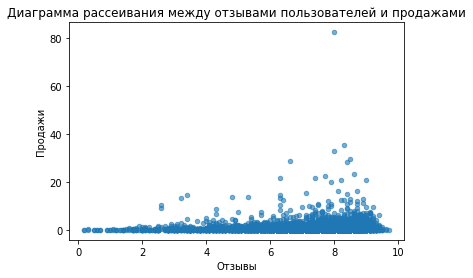

In [ ]:
df[df['user_score'] != 0].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.6).set(
    title='Диаграмма рассеивания между отзывами пользователей и продажами', xlabel='Отзывы', ylabel='Продажи')

**Коэффициент Пирсона**

In [ ]:
print(df['user_score'].corr(df['total_sales']))

0.1361811453991485


**Вывод:**
- **отзывы критиков и пользователей не влияют на продажи на других платформах**

### Рассмотрим общие распределение игр по жанрам медианным значение.

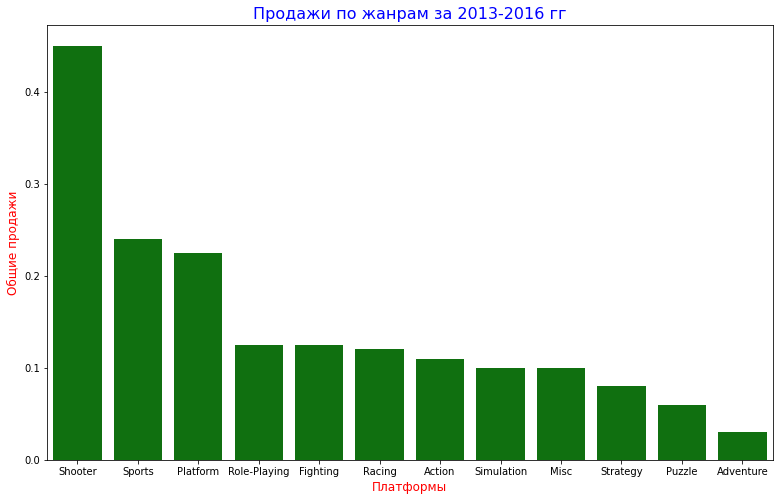

In [ ]:
plt.figure(figsize=(13, 8))
platform_slice = slice_year.pivot_table(index='genre', values='total_sales', aggfunc='median').sort_values(
    'total_sales', ascending=False)
(sns.barplot(data = platform_slice, x = platform_slice.index, y = 'total_sales', color = 'green'))
plt.title('Продажи по жанрам за 2013-2016 гг', fontsize=16, color = 'blue')
plt.xlabel('Платформы', fontsize=12, color = 'red')
plt.ylabel('Общие продажи',fontsize=12, color = 'red')
plt.show()

**Вывод:**
- **после распределения игр по жанрам медианным значение, в топ 3 по жанрам входит Shooter,  Sport, Platform**

## Составим портрет пользователя каждого региона.

### Определим для пользователя каждого региона (NA, EU, JP)

### Самые популярные платформы (топ-5).

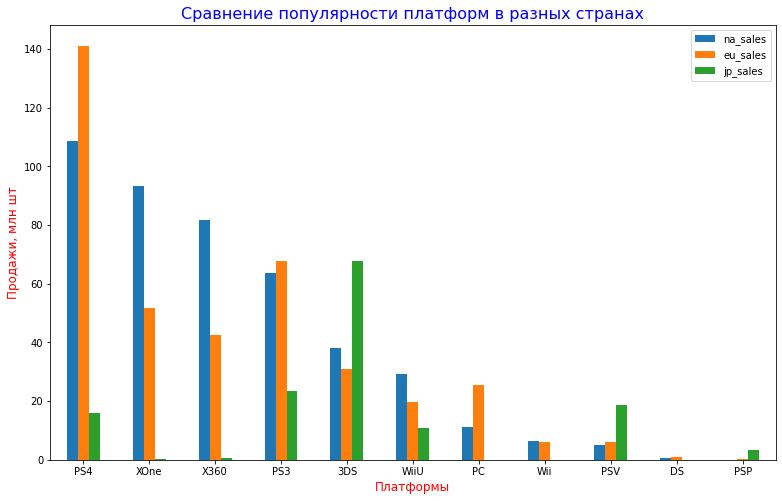

In [ ]:
# сумма проданных копий для Северной Америки по платформам
na_platf = slice_year.groupby(['platform'])['na_sales'].agg(['sum'])
# сумма проданных копий для Европы по платформам
eu_platf = slice_year.groupby(['platform'])['eu_sales'].agg(['sum'])
# сумма проданных копий для Японии по платформам
jp_platf = slice_year.groupby(['platform'])['jp_sales'].agg(['sum'])
# объединяем
users_platf = pd.concat([na_platf, eu_platf, jp_platf], axis=1).reset_index()
users_platf.columns = ['platform', 'na_sales', 'eu_sales', 'jp_sales']
users_platf = users_platf.sort_values(by='na_sales', ascending=False)
# строим bar plot
users_platf.plot.bar(x="platform", rot=0, figsize =(13, 8))
plt.title('Сравнение популярности платформ в разных странах', fontsize=16, color = 'blue')
plt.xlabel('Платформы', fontsize=12, color = 'red')
plt.ylabel('Продажи, млн шт',fontsize=12, color = 'red')
plt.show()

**Вывод:**
- **в Америке в топ 5 входят платформы PS4, XOne, X360, PS3, 3DS**
- **в Европе в топ 5 входят платформы PS4, PS3, XOne, X360,  3DS**
- **в Японии в топ 5 входят платформы 3DS, PS3, PSV, PS4, WiiU**

### Самые популярные жанры (топ-5).

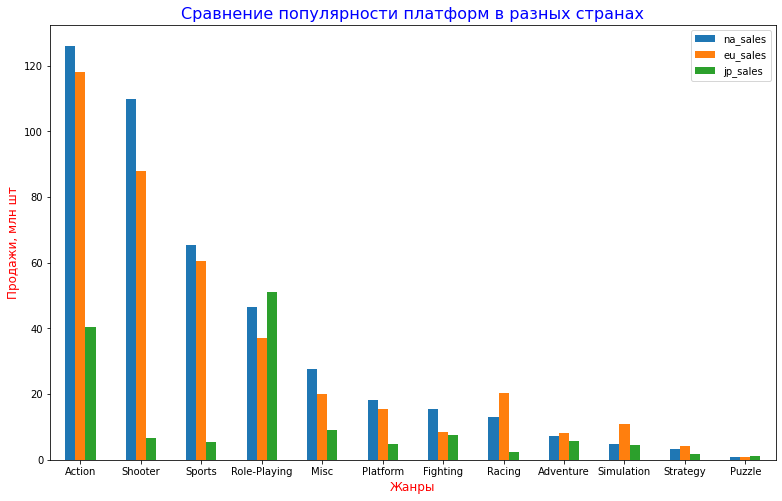

In [ ]:
# сумма проданных копий для Северной Америки по жанрам
na_platf = slice_year.groupby(['genre'])['na_sales'].agg(['sum'])
# сумма проданных копий для Европы по жанрам
eu_platf = slice_year.groupby(['genre'])['eu_sales'].agg(['sum'])
# сумма проданных копий для Японии по жанрам
jp_platf = slice_year.groupby(['genre'])['jp_sales'].agg(['sum'])
# объединяем
users_platf = pd.concat([na_platf, eu_platf, jp_platf], axis=1).reset_index()
users_platf.columns = ['genre', 'na_sales', 'eu_sales', 'jp_sales']
users_platf = users_platf.sort_values(by='na_sales', ascending=False)
# строим bar plot
users_platf.plot.bar(x="genre", rot=0, figsize =(13, 8))
plt.title('Сравнение популярности платформ в разных странах', fontsize=16, color = 'blue')
plt.xlabel('Жанры', fontsize=12, color = 'red')
plt.ylabel('Продажи, млн шт',fontsize=12, color = 'red')
plt.show()

**Вывод:**
- **в Америке в топ 5 входят платформы Action, Shooter, Sport, Role-Playng, Misc**
- **в Европе в топ 5 входят платформы Action, Shooter, Sport, Role-Playng, Misc**
- **в Японии в топ 5 входят платформы Role-Playng, Action, Misc, Fighting, Shooter**

### Оприделим влияние рейтинга ESRB на продажи в отдельном регионе.

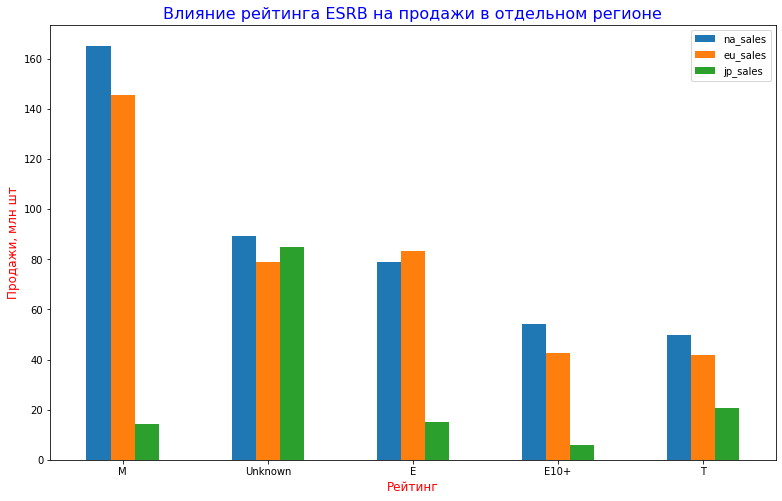

In [ ]:
# сумма проданных копий для Северной Америки по рейтенгу
na_platf = slice_year.groupby(['rating'])['na_sales'].agg(['sum'])
# сумма проданных копий для Европы по рейтенгу
eu_platf = slice_year.groupby(['rating'])['eu_sales'].agg(['sum'])
# сумма проданных копий для Японии по рейтенгу
jp_platf = slice_year.groupby(['rating'])['jp_sales'].agg(['sum'])
# объединяем
users_platf = pd.concat([na_platf, eu_platf, jp_platf], axis=1).reset_index()
users_platf.columns = ['rating', 'na_sales', 'eu_sales', 'jp_sales']
users_platf = users_platf.sort_values(by='na_sales', ascending=False)
# строим bar plot
users_platf.plot.bar(x="rating", rot=0, figsize =(13, 8))
plt.title('Влияние рейтинга ESRB на продажи в отдельном регионе', fontsize=16, color = 'blue')
plt.xlabel('Рейтинг', fontsize=12, color = 'red')
plt.ylabel('Продажи, млн шт',fontsize=12, color = 'red')
plt.show()

**Вывод:**
- **из графика видно, что рейтинг влияет на продажи в отдельном регионе в связи с отличием предпочтений в Америке, Европе и Японии**

## Проверим гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**Нулевая гипотеза:** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

**Альтернативная гипотеза:** Средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [ ]:
# удаляем значения равные 0
slice_year[slice_year['user_score'] != 0]

results = st.ttest_ind(slice_year.query('platform == "XOne"')['user_score'], slice_year.query(
    'platform == "PC"')['user_score'])

alpha = .05
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Принимаем нулевую гипотезу")

p-значение: 0.24875948537089854
Принимаем нулевую гипотезу


**Вывод:**
- Принимаем нулевую гипотезу

### Средние пользовательские рейтинги жанров Action разные

**Нулевая гипотеза:** Средние пользовательские рейтинги жанров Action и Sports одинаковые.

**Альтернативная гипотеза:** Средние пользовательские рейтинги жанров Action и Sports разные.

In [ ]:
results = st.ttest_ind(slice_year.query('genre == "Action"')['user_score'], slice_year.query(
    'genre == "Sports"')['user_score'])

alpha = 0.05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Принимаем нулевую гипотезу")

p-значение: 0.09074207113403263
Принимаем нулевую гипотезу


**Вывод:**
- Принимаем нулевую гипотезу

## Общий вывод:
- изучив общую информацию и проведя подготовку данных, дубликатов не обнаружено, пропуски обнаружены в 5-ти столбцах
- причина образования пропусков возможно ошибка при сооединении двух таблиц
- **проведя иследовательский анализ определили:**
- что пиковые значения продаж находятся в период с 2005 года по 2010 год, далее спад, возможно                                  повлиял кризис
- максимальное количество продаж в 6-ти группах: PS2, X360, PS3, Wii, DS, PS
- платформа PS2, продажи начались 2000г, пик продаж наблюдался в период с 2001г по 2005г, затем                                  следует спад, в 2011г. продажи прекратились
- платформа X360, продажи начались 2005г, пик продаж наблюдался в период с 2007г по 2012г, затем                                следует спад, в 2016г. продажи прекратились
- платформа PS3, продажи начались 2006г, пик продаж наблюдался в период с 2008г по 2013г, затем                                  следует с пад, в 2016г. продажи прекратились
- платформа Wii, продажи начались 2006г, пик продаж наблюдался в период с 2006г по 2010г, затем                                  следует спад, в 2016г. продажи прекратились
- платформа DS, продажи начались 1985г, пик продаж наблюдался в период с 2005г по 2009г, затем                                  следует спад, в 2013г. продажи прекратились
- платформа PS, продажи начались 1994г, пик продаж наблюдался в период с 1997г по 1999г, затем                                 следует спад, в 2003г. продажи прекратились
- старые плотформы образовывались 1985 и 1994 годах в среднем живут от 10 до 20 лет
- новые платформы появляются примерно через 2-3 года после исчезновения старых
- по ранее отобранным перспективным группам X360, PS3, Wii провели прогноз на 2017 год., на графике "количество игр выпущеное в разные годы" четко прослеживается аналитическое плато с 2013г по 2016г, его и возяли за актуальный период
- с наибольшой вероятностью можно сказать, что 2017 году будут выпускаться игры на платформах X360, PS3
- наиболее прибыльными платформами можно считать X360, PS3, Wii так как они в топе по прибыли, продолительности продаж и перспективе ближайшего будущего
- есть смысл развивать и вкладываться в выше указанные платформы
- отзывы критиков и пользователей не влияют на продажи
- в топ 3 по жанрам входит Action, Shooter, Sport
- **портрет пользователя каждого региона выглядит следующим образом:**
- в Америке в топ 5 входят платформы PS4, XOne, X360, PS3, 3DS
- в Европе в топ 5 входят платформы PS4, PS3, XOne, X360,  3DS
- в Японии в топ 5 входят платформы 3DS, PS3, PSV, PS4, WiiU
- в Америке в топ 5 входят платформы Action, Shooter, Sport, Role-Playng, Misc
- в Европе в топ 5 входят платформы Action, Shooter, Sport, Role-Playng, Misc
- в Японии в топ 5 входят платформы Role-Playng, Action, Misc, Fighting, Shooter
- рейтинг влияет на продажи в отдельном регионе в связи с отличием                                                             предпочтений в Америке, Европе и Японии
- **при проверке гипотиз выявили следующее:**
- Приняли нулевую гипотезу "Средние пользовательские рейтинги платформ Xbox One и PC                                            одинаковые."
- Приняли нулевую гипотезу "Средние пользовательские рейтинги жанров Action и Sports                                           одинаковые"